# Maximum Clique with D-Wave

Ocean D-Waves Systems beschikt over een `maximum_clique` functie: [docs](https://docs.ocean.dwavesys.com/en/stable/docs_dnx/reference/algorithms/generated/dwave_networkx.maximum_clique.html)  

Gebaseerd op [QUBO](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization)  

**DWaveSampler ~ Standaard sampler**  
Lukt voor 2x2 TeraVex uit te rekenen   
Bij 3x3 wordt er een clique teruggegeven, maar te klein (niet compleet)   
Vanaf 4x4 lukt het niet meer  

| size board  | sec  |  #missingPieces |
|---|---|---|
| 2x2  | 0.166  | 0 |
| 3x3  | 0.143  | 3 |
| 4x4  |  / | / |



**LeapHybridSampler**

| size board  | sec  |  #missingPieces |
|---|---|---|
| 2x2  | 02.984  | 0 |
| 3x3  | 02.997  | 0 |
| 4x4  | 02.990  | 0 |
| 5x5  | 02.994  | 0 |
| 6x6  | 03.606  | 0 |
| 7x7  | 06.134  | 6 |
| 8x8  | 10.000  | 8 |

[Solve large QUBO Problem](https://support.dwavesys.com/hc/en-us/community/posts/360029426154-Solving-a-large-QUBO-problem)   
[Getting started with D-Wave](https://docs.dwavesys.com/docs/latest/doc_getting_started.html)  
[An Analysis of Quantum Annealing Algorithms for Solving the Maximum Clique Problem](http://arxiv.org/abs/2406.07587) --> ideale paper over DWave  

In [1]:
from dwave.system.samplers import DWaveSampler, LeapHybridSampler, DWaveCliqueSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx

import numpy as np
import networkx as nx
from matplotlib.tri import Triangulation
from matplotlib import pyplot as plt

In [11]:
sizeBoard = 3

In [12]:
# Get the values & pieces from the TetraVex game
# Values are for visualization
# Pieces are for the algorithm
def getValuesAndPieces(file):
    north = []
    east = []
    south = []
    west = []
    pieces = {}
    i = 0
    for line in file:
        sides = line.split(" ")
        pieces[i] = [int(sides[0]), int(sides[1]), int(sides[2]), int(sides[3])]
        i += 1
        north.append([int(sides[0])])
        east.append([int(sides[1])])
        south.append([int(sides[2])])
        west.append([int(sides[3])])

    values = [north, east, south, west]
    print("values: " + str(values))
    print("pieces: " + str(pieces))
    return values, pieces

In [13]:
def visualizeBoard(values, sizeBoard):
    xv, yv = np.meshgrid(np.arange(-0.5, sizeBoard), np.arange(-0.5, sizeBoard))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, sizeBoard), np.arange(0, sizeBoard))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (sizeBoard + 1) * (sizeBoard + 1)  # indices of the centers

    trianglesN = [(i + j * (sizeBoard + 1), i + 1 + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesE = [(i + 1 + j * (sizeBoard + 1), i + 1 + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesS = [(i + 1 + (j + 1) * (sizeBoard + 1), i + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesW = [(i + (j + 1) * (sizeBoard + 1), i + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    triangul = [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

    cmaps = 'tab10' # Color map based out of 10 colors
    fig, ax = plt.subplots()
    imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmaps, vmin=0, vmax=9, ec='white')
                for t, val in zip(triangul, values)]

    # TODO Add text (nog te fixen)
    # for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    #     for i in range(M):
    #         for j in range(N):
    #             v = val[j, i]
    #             ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.2f}', color='k' if 0.2 < v < 0.8 else 'w', ha='center', va='center')
    # cbar = fig.colorbar(imgs[0], ax=ax)

    ax.set_xticks(range(sizeBoard))
    ax.set_yticks(range(sizeBoard))
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect('equal', 'box')  # square cells
    plt.tight_layout()
    plt.show()

values: [[[5], [9], [7], [4], [0], [6], [6], [9], [4], [7], [1], [1], [6], [9], [6], [0]], [[9], [1], [3], [1], [1], [9], [8], [8], [7], [6], [5], [3], [1], [7], [0], [4]], [[0], [6], [6], [9], [4], [7], [1], [1], [6], [9], [6], [0], [0], [2], [7], [8]], [[5], [9], [1], [3], [0], [1], [9], [8], [4], [7], [6], [5], [3], [1], [7], [0]]]
pieces: {0: [5, 9, 0, 5], 1: [9, 1, 6, 9], 2: [7, 3, 6, 1], 3: [4, 1, 9, 3], 4: [0, 1, 4, 0], 5: [6, 9, 7, 1], 6: [6, 8, 1, 9], 7: [9, 8, 1, 8], 8: [4, 7, 6, 4], 9: [7, 6, 9, 7], 10: [1, 5, 6, 6], 11: [1, 3, 0, 5], 12: [6, 1, 0, 3], 13: [9, 7, 2, 1], 14: [6, 0, 7, 7], 15: [0, 4, 8, 0]}


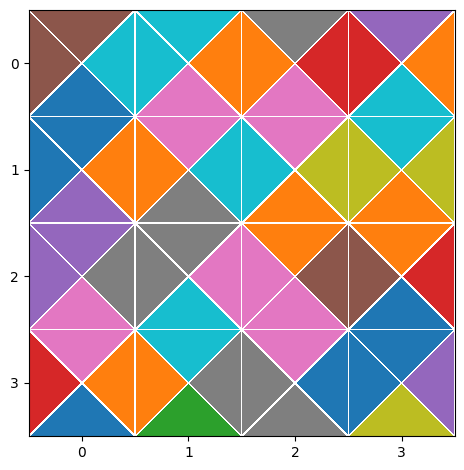

In [14]:
# Solution
file = open("./dataFiles/TetraVex_" + str(sizeBoard) + "x"  + str(sizeBoard) + "_Solution.txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

values: [[[9], [6], [7], [5], [6], [9], [6], [1], [0], [0], [1], [4], [6], [4], [7], [9]], [[7], [9], [3], [9], [0], [1], [1], [5], [1], [4], [3], [1], [8], [7], [6], [8]], [[2], [7], [6], [0], [7], [6], [0], [6], [4], [8], [0], [9], [1], [6], [9], [1]], [[1], [1], [1], [5], [7], [9], [3], [6], [0], [0], [5], [3], [9], [4], [7], [8]]]
pieces: {0: [9, 7, 2, 1], 1: [6, 9, 7, 1], 2: [7, 3, 6, 1], 3: [5, 9, 0, 5], 4: [6, 0, 7, 7], 5: [9, 1, 6, 9], 6: [6, 1, 0, 3], 7: [1, 5, 6, 6], 8: [0, 1, 4, 0], 9: [0, 4, 8, 0], 10: [1, 3, 0, 5], 11: [4, 1, 9, 3], 12: [6, 8, 1, 9], 13: [4, 7, 6, 4], 14: [7, 6, 9, 7], 15: [9, 8, 1, 8]}


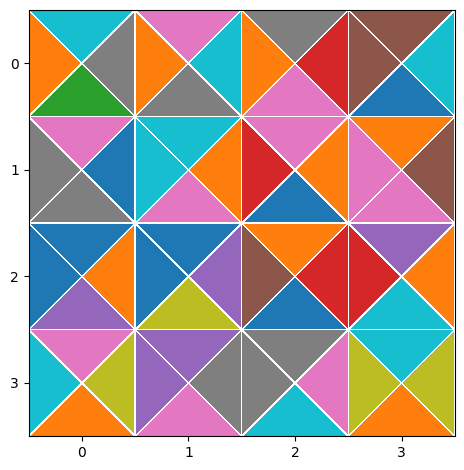

In [15]:
# Start board
file = open("./dataFiles/TetraVex_" + str(sizeBoard) + "x"  + str(sizeBoard) + ".txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

In [16]:
def visualizeSolution(max_clique_solution):
    north = [0] * (sizeBoard * sizeBoard)
    east = [0] * (sizeBoard * sizeBoard)
    south = [0] * (sizeBoard * sizeBoard)
    west = [0] * (sizeBoard * sizeBoard)

    for node in max_clique_solution:
        node = str(node).split(";")
        for i in range(0, len(node)):
            node[i] = int(node[i])

        row = node[0] 
        column = node[1]
        boardPiece = node[2]

        north[column + row*sizeBoard] = pieces.get(boardPiece)[0]
        east[column + row*sizeBoard] = pieces.get(boardPiece)[1]
        south[column + row*sizeBoard] = pieces.get(boardPiece)[2]
        west[column + row*sizeBoard] = pieces.get(boardPiece)[3]
           
    values = [north, east, south, west]
    visualizeBoard(values, sizeBoard)

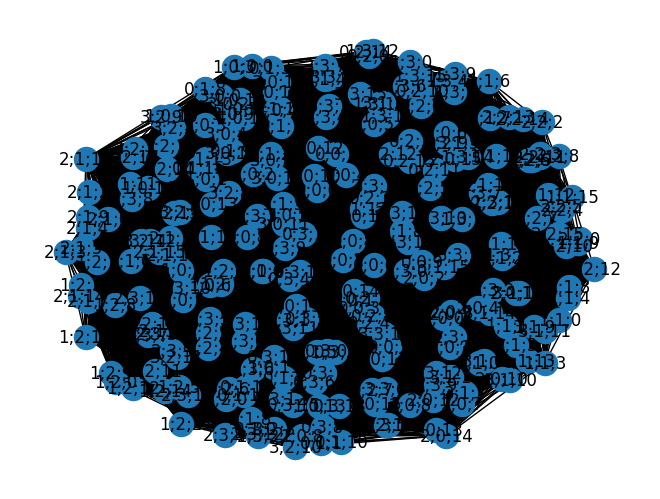

Graph: 256 nodes, 23868 edges


In [17]:
# Build Graph
size = len(pieces)
graph = {}
for piece1, colors1 in pieces.items():
    for row1 in range(sizeBoard):
        for col1 in range(sizeBoard):
            for piece2, colors2 in pieces.items():
                if piece1 == piece2:
                        continue
                for row2 in range(sizeBoard):
                    for col2 in range(sizeBoard): 
                        if row1 == row2 and col1 == col2:
                            continue
                        node1 = (row1, col1, piece1)
                        node2 = (row2, col2, piece2)

                        graph.setdefault(node1, []).append(node2)

                        if row1-1 == row2 and col1 == col2 \
                            and colors1[0] != colors2[2]:
                                graph[node1].remove(node2)

                        if row1 == row2-1 and col1 == col2 \
                            and colors1[2] != colors2[0]:
                                graph[node1].remove(node2)

                        if row1 == row2 and col1-1 == col2 \
                            and colors1[3] != colors2[1]:
                                graph[node1].remove(node2)   

                        if row1 == row2 and col1 == col2-1 \
                            and colors1[1] != colors2[3]:
                                graph[node1].remove(node2) 

# for node, edges in graph.items():
#     print(str(node) + ": " + str(edges))

G = nx.Graph()
for node, edges in graph.items():
    for edge in edges:
        nodeStr = str(node[0]) + ";" + str(node[1]) + ";" + str(node[2])
        edgeStr = str(edge[0]) + ";" + str(edge[1]) + ";" + str(edge[2])
        G.add_edge(nodeStr, edgeStr)
nx.draw(G, with_labels = True)
plt.show()

print("Graph: " + str(G.number_of_nodes()) + " nodes, " + str(G.number_of_edges()) + " edges")

In [18]:
# sampler = EmbeddingComposite(DWaveSampler())

sampler = DWaveCliqueSampler()

# sampler = LeapHybridSampler()
labelStr = 'Maximum Clique - TetraVex - ' + str(sizeBoard) + 'x' + str(sizeBoard)

maxClique =  dnx.algorithms.maximum_clique(G, sampler, label=labelStr)

c:\Users\wannes.vandeputte\Desktop\Masterproef-Code\.env\Lib\site-packages\dwave_networkx\algorithms\clique.py:24: SyntaxWarning: invalid escape sequence '\s'
  """
c:\Users\wannes.vandeputte\Desktop\Masterproef-Code\.env\Lib\site-packages\dwave_networkx\algorithms\clique.py:95: SyntaxWarning: invalid escape sequence '\o'
  """
c:\Users\wannes.vandeputte\Desktop\Masterproef-Code\.env\Lib\site-packages\dwave\system\samplers\clique.py:120: SyntaxWarning: invalid escape sequence '\p'
  """A sampler for solving clique binary quadratic models on the D-Wave system.


ValueError: Cannot embed given BQM (size 256), sampler can only handle problems of size 177

Max Clique Result:  ['0;0;7', '0;2;0', '1;0;3', '1;2;1', '1;2;2', '2;0;5', '2;1;1']
No solution found
Max Clique Result:  7
2 missing pieces


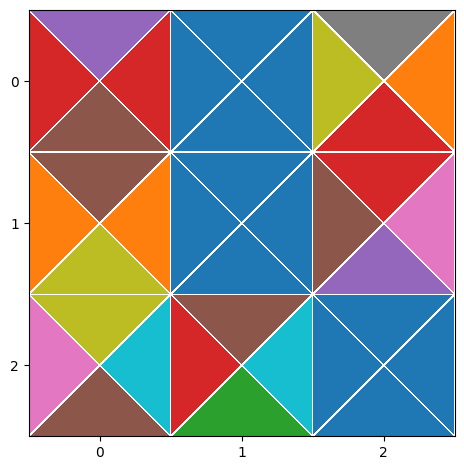

In [ ]:
print("Max Clique Result: ", maxClique)
if(len(maxClique) == sizeBoard*sizeBoard):
    visualizeSolution(maxClique)
else:
    print("No solution found")
    print("Max Clique Result: ", len(maxClique))
    noMissingPieces = sizeBoard*sizeBoard - len(maxClique)
    print(str(noMissingPieces) + " missing pieces")
    visualizeSolution(maxClique)